<a href="https://colab.research.google.com/github/crashoverloaded/ML_Practice/blob/main/License_plate_and_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14086, done.
remote: Total 14086 (delta 0), reused 0 (delta 0), pack-reused 14086
Receiving objects: 100% (14086/14086), 12.72 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (9587/9587), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-01 08:24:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.02MB/s    in 52s     

2020-08-01 08:25:50 (4.59 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 Anniversary_Chachu
 bc.mp4
'Colab Notebooks'
'Copy of Copy of Flash Cards Game.gsheet'
'Copy of Feedback for January task.gsheet'
'Copy of Flash Cards Game (1).gsheet'
'Copy of Flash Cards Game (2).gsheet'
'Copy of Flash Cards Game.gsheet'
'Copy of Flash Cards Game (hi) (1).gsheet'
'Copy of Flash Cards Game (hi).gsheet'
'Copy of Trivia Game Multiple Choice.gsheet'
 Coursera.txt
'dsa (1).gsheet'
'dsa (2).gsheet'
'dsa (3).gsheet'
'dsa (4).gsheet'
'dsa (5).gsheet'
'dsa (6).gsheet'
'dsa (7).gsheet'
'dsa (8).gsheet'
'dsa (9).gsheet'
 dsa.gsheet
 filename.avi
'Git and Github.gslides'
 git_install.png
 git_log.png
 internshala.txt
'Mr. Movieholic Privacy Policy.gdoc'
 My_Python_Jorney.txt
'My_RESUME(1).pdf'
 Pics_Linkedin
'Priyank_Agarwal_Resume(1).pdf'
'sample resume '
'Screenshot from 2020-02-23 17-44-31.png'
 Socioterians.gsheet
'untitled 1 (1).od.gsheet'
'untitled 1 (2).od.gsheet'
'untitled 1 (3).od.gsheet'
'

In [ ]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit

/content/darknet


In [ ]:
%cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 3.3MB 4.5MB/s 
     |████████████████████████████████| 6.5MB 34.3MB/s 
  Found existing installation: botocore 1.17.30
    Uninstalling botocore-1.17.30:
      Successfully uninstalled botocore-1.17.30
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


In [ ]:
!python main.py downloader --classes Vehicle_registration_plate --type_csv train --limit 1000 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Vehicle registration plate'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 40794 KB/s, 0 s

In [ ]:
!cp /content/classes.txt .

In [ ]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Vehicle registration plate
100% 1000/1000 [00:18<00:00, 54.69it/s]


In [ ]:
!rm -r OID/Dataset/train/Vehicle\ registration\ plate/Label

In [ ]:
!mkdir OID/Dataset/train/obj

In [ ]:
!mv OID/Dataset/train/Vehicle\ registration\ plate/*   OID/Dataset/train/obj/

In [ ]:
!rmdir OID/Dataset/train/Vehicle\ registration\ plate

In [ ]:
!cp /content/obj.names data/
!cp /content/obj.data  data/

In [ ]:
!git clone https://github.com/theAIGuysCode/YoloGenerateTrainingFile

Cloning into 'YoloGenerateTrainingFile'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
!cp -rf OID/Dataset/train/obj    ../darknet/data/

In [ ]:
!cp YoloGenerateTrainingFile/generate_train.py  ../darknet/

In [ ]:
%cd ../darknet

/content/darknet


In [ ]:
!cat generate_train.py

import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
!python generate_train.py

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-08-01 19:25:33--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74     3%[                    ]   5.35M   472KB/s    eta 5m 34s ^C


In [ ]:
!cp /content/yolov3_custom.cfg  cfg/

In [ ]:
!mkdir /mydrive/yolov3/
!mkdir /mydrive/yolov3/backup

mkdir: cannot create directory ‘/mydrive/yolov3/’: File exists


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000039, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.060706, iou_loss = 0.000000, total_loss = 0.060706 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.623497, GIOU: 0.591238), Class: 0.998710, Obj: 0.183292, No Obj: 0.000061, .5R: 0.666667, .75R: 0.333333, count: 3, class_loss = 0.802880, iou_loss = 0.802512, total_loss = 1.605391 
 total_bbox = 48346, rewritten_bbox = 0.221321 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000003, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.559663, GIOU: 0.486804), Class: 0.888175, Obj: 0.000027, No Obj: 

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /content/sas.jpg -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

# Test Image


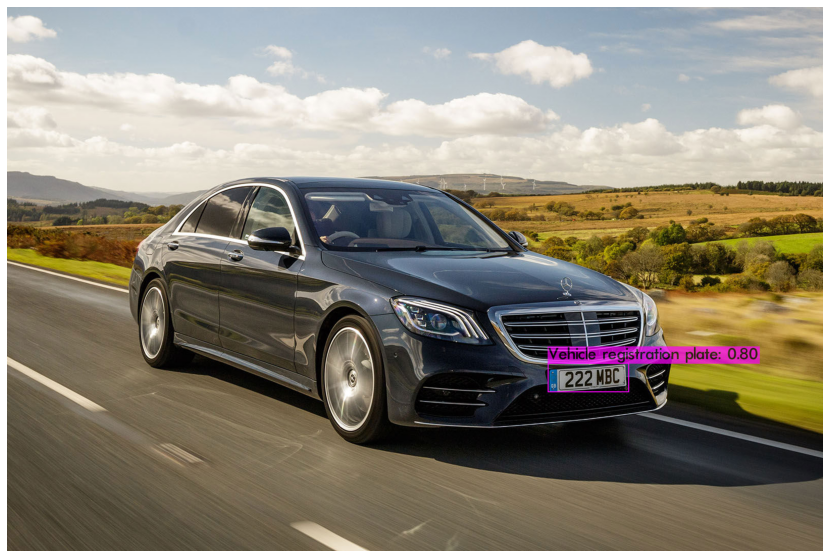

In [ ]:
imShow('predictions.jpg')

# IMPLEMENTED YOLOv3 ON VIDEO 

In [ ]:
import cv2
import numpy as np

#classesfile = '/content/darknet/data/obj.names'
classes = ['Vehicle registration plate']
modelconfig = '/content/darknet/cfg/yolov3_custom.cfg'
modelweights = '/mydrive/yolov3/backup/yolov3_custom_final.weights'

net = cv2.dnn.readNetFromDarknet(modelconfig , modelweights)

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL_FP16)

confidence_thresold= 0.5
nms_threshold = 0.3
def findobjects(outputs , img):
  ht , wt , ct = img.shape
  bbox=[]
  classIds = []
  confd = []
  for output in outputs:
    for detection in output:
      scores = detection[5:]
      classId = np.argmax(scores)
      confidence = scores[classId]
      if   confidence > confidence_thresold:
        w,h = int(detection[2] * wt) , int(detection[3] * ht)
        x,y = int((detection[0] * wt) - w/2) , int((detection[1] * ht) - h/2)
        bbox.append([x,y,w,h])
        classIds.append(classId)
        confd.append(float(confidence))
  indices = cv2.dnn.NMSBoxes(bbox,confd,confidence_thresold , nms_threshold)
  for i in indices:
    i = i[0]
    box = bbox[i]
    x,y,w,h = box[0] , box[1] , box[2] , box[3]
    cv2.rectangle(img , (x,y) , (x+w,y+h) , (255,0,255) , 0)
cap = cv2.VideoCapture('/was.mp4')
frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4))
size = (frame_height,frame_width)
result = cv2.VideoWriter('filename.mp4',0x7634706d, 10, size) 

while True:
  ret  ,frame = cap.read()
  if ret == True:
  # convert image to blob , beacuse network only accepts in that
    blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320), [0,0,0] , 1 , crop = False)
    net.setInput(blob)

  # names of layer
    layerNames  = net.getLayerNames()
  # extracting op layer
    op_indice = net.getUnconnectedOutLayers()
  
  # so above line outputs the indices of layer , now getting name of layer
    opnames = [layerNames[i[0] - 1] for i in op_indice]

    outputs = net.forward(opnames)
    findobjects(outputs , frame)
    result.write(frame)
  else:
    print('sa')
    break
cap.release() 
result.release() 

#OCR OF LICENSE PLATE


In [ ]:
from PIL import Image
from io import BytesIO
#image_name will be a list of all file names
#image_number will be the Number Plate content
image_name=[]
image_number=[]
# Replace <Subscription Key> with your valid subscription key for Microsoft Vision API.
subscription_key = "e8d0ef46bf7a4964b7d58675fc135aa0"
assert subscription_key
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"
ocr_url = vision_base_url + "ocr"
for x in output:
    try:
        image_url = x
        image_data = open(image_url, "rb").read()
        headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
        params = {'language': 'unk', 'detectOrientation': 'true'}
        data = {'url': image_url}
        response = requests.post(ocr_url, headers=headers, params=params, data = image_data)
        response.raise_for_status()

        analysis = response.json()
        line_infos = [region["lines"] for region in analysis["regions"]]
        word_infos = []
        for line in line_infos:
             for word_metadata in line:
                    for word_info in word_metadata["words"]:
                              word_infos.append(word_info)
        label=[]
        for word in word_infos:
              label.append(word["text"])
        image_number.append(label)
        image_name.append(image_url)
    except:
        pass

In [ ]:
!cp /ab1c.mp4 /mydrive/